Grebbedijk_20_40m_scenario_10000
Total time taken: 54.23639249801636 seconds


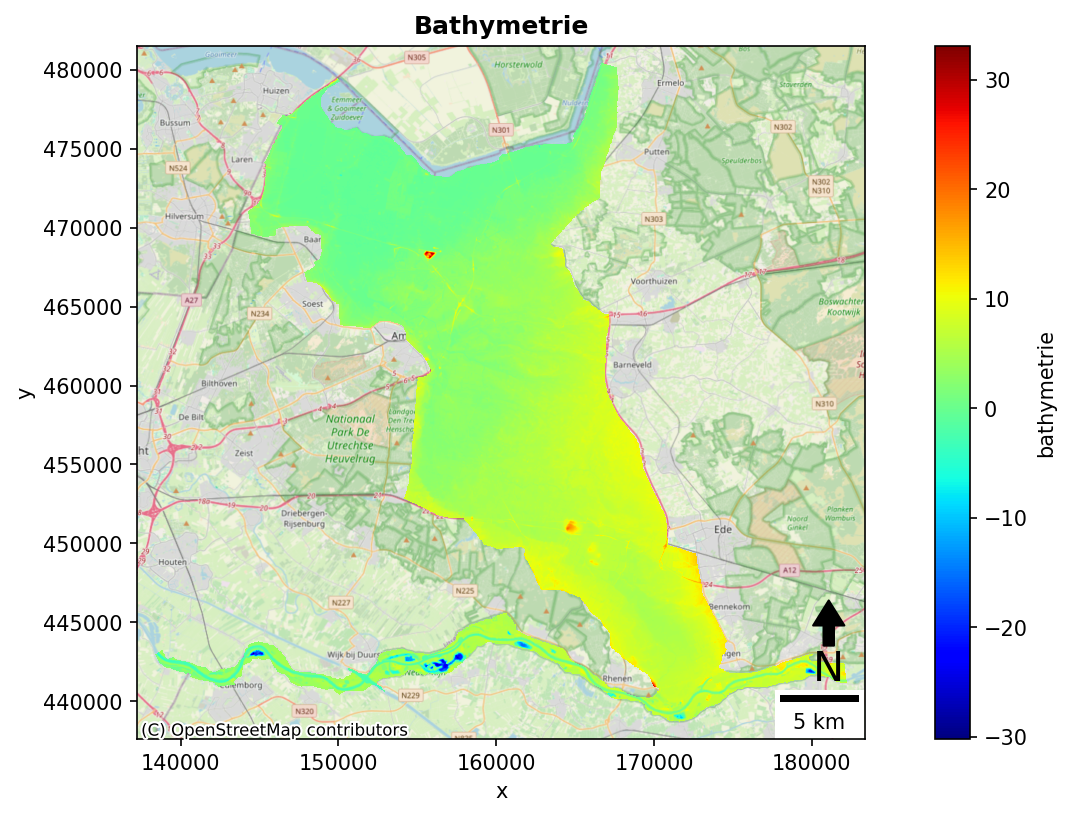

In [1]:
# -*- coding: utf-8 -*-
"""
The fou.nc file is read and *variable* is extracted. Next, the mesh data is 
converted to a raster and saved to a .tiff.
Created on Fri December 1th 2023

@author: Hydrologic
"""

import os, sys
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
sys.path.append("..")

from model.dataloader.dataloader_flowmesh import mesh_to_tiff
from model.helper_functions.plotting import raster_plot_with_context

# Initialize base directory
inputdir = '...'
outputdir = '...'

# Obtain all scenario's as specified in the folder
cases = [item for item in os.listdir(inputdir) if os.path.isdir(os.path.join(inputdir, item))]

# Raster options
resolution = 20  # m
distance_tol = 36  # m
interpolation = r"nearest"

for case in cases:
    print(case)

    # Generate output directory
    if not os.path.exists(os.path.join(outputdir, case)):
        os.makedirs(os.path.join(outputdir, case))

    # Load mesh coordinates and data from netCDF 
    data_clm = nc.Dataset(inputdir + '/%s/DFM_clm.nc' % case)
    # Load fourier data on maximum depth
    node_data = np.asarray(data_clm.variables['Mesh2d_flowelem_bl'][:]).flatten()

    # convert to raster and save as tiff
    _, _, grid_data = mesh_to_tiff(
        node_data,
        inputdir + '/%s/DFM_clm.nc' % case,
        os.path.join(outputdir, case) + '/bathymetrie.tiff',
        resolution,
        distance_tol,
        interpolation=interpolation,
    )
    fig, ax = raster_plot_with_context(
        raster_path = os.path.join(outputdir, case) + '/bathymetrie.tiff', 
        epsg = 28992, 
        clabel = "bathymetrie", 
        cmap = "jet",
        title = "Bathymetrie",
    )